In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("data/mobile phone price/train.csv")
test = pd.read_csv("data/mobile phone price/test.csv")

In [3]:
train.shape

(2000, 21)

In [4]:
test.shape

(1000, 21)

In [5]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,11031
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,15456
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,15531
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,14718
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,10558


In [6]:
train['type']='Train'

In [7]:
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [8]:
test_data = test.drop("id",axis=1)

In [9]:
test_data['type']="Test"

In [10]:
data= pd.concat([train,test_data])

In [11]:
data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price,type
995,1700,1,1.9,0,0,1,54,0.5,170,7,...,913,2121,14,8,15,1,1,0,NaN,Test
996,609,0,1.8,1,0,0,13,0.9,186,4,...,1632,1933,8,1,19,0,1,1,NaN,Test
997,1185,0,1.4,0,1,1,8,0.5,80,1,...,825,1223,5,0,14,1,0,0,NaN,Test
998,1533,1,0.5,1,0,0,50,0.4,171,2,...,832,2509,15,11,6,0,1,0,NaN,Test
999,1270,1,0.5,0,4,1,35,0.1,140,6,...,608,2828,9,2,3,1,0,1,NaN,Test


### preprocessing

In [12]:
data.isna().sum()


battery_power       0
blue                0
clock_speed         0
dual_sim            0
fc                  0
four_g              0
int_memory          0
m_dep               0
mobile_wt           0
n_cores             0
pc                  0
px_height           0
px_width            0
ram                 0
sc_h                0
sc_w                0
talk_time           0
three_g             0
touch_screen        0
wifi                0
price            1000
type                0
dtype: int64

In [13]:
data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price            float64
type              object
dtype: object

In [14]:
cat_cols = ['blue','dual_sim','four_g','three_g','touch_screen','wifi']

In [15]:
for x in cat_cols:
    data[x] = data[x].map({0:'No',1:'Yes'})

In [16]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price,type
0,842,No,2.2,No,1,No,7,0.6,188,2,...,756,2549,9,7,19,No,No,Yes,11031.0,Train
1,1021,Yes,0.5,Yes,0,Yes,53,0.7,136,3,...,1988,2631,17,3,7,Yes,Yes,No,15456.0,Train
2,563,Yes,0.5,Yes,2,Yes,41,0.9,145,5,...,1716,2603,11,2,9,Yes,Yes,No,15531.0,Train
3,615,Yes,2.5,No,0,No,10,0.8,131,6,...,1786,2769,16,8,11,Yes,No,No,14718.0,Train
4,1821,Yes,1.2,No,13,Yes,44,0.6,141,2,...,1212,1411,8,2,15,Yes,Yes,No,10558.0,Train


In [17]:
data.dtypes

battery_power      int64
blue              object
clock_speed      float64
dual_sim          object
fc                 int64
four_g            object
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g           object
touch_screen      object
wifi              object
price            float64
type              object
dtype: object

In [18]:
data.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,2000.000000
mean,1241.849000,1.528467,4.404000,32.581667,0.507000,140.003000,4.456333,9.962333,639.112333,1247.601667,2129.141333,12.202667,5.616667,11.035667,12687.479000
std,437.063804,0.820358,4.383742,18.152810,0.285969,35.213809,2.289361,6.073923,440.202998,434.666168,1085.694231,4.251151,4.322494,5.474400,5485.254756
min,500.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,4594.000000
25%,863.750000,0.700000,1.000000,16.000000,0.200000,109.000000,2.000000,5.000000,277.750000,865.000000,1212.750000,9.000000,2.000000,6.000000,8494.500000
50%,1232.000000,1.500000,3.000000,33.000000,0.500000,140.000000,4.000000,10.000000,564.000000,1248.000000,2147.500000,12.000000,5.000000,11.000000,12660.000000
75%,1619.000000,2.300000,7.000000,48.000000,0.800000,170.000000,6.000000,15.000000,932.500000,1634.000000,3065.250000,16.000000,9.000000,16.000000,16952.000000
max,1999.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,20862.000000


In [19]:
#dummy variables
data=pd.get_dummies(data)


In [20]:
data.dtypes

battery_power         int64
clock_speed         float64
fc                    int64
int_memory            int64
m_dep               float64
mobile_wt             int64
n_cores               int64
pc                    int64
px_height             int64
px_width              int64
ram                   int64
sc_h                  int64
sc_w                  int64
talk_time             int64
price               float64
blue_No               uint8
blue_Yes              uint8
dual_sim_No           uint8
dual_sim_Yes          uint8
four_g_No             uint8
four_g_Yes            uint8
three_g_No            uint8
three_g_Yes           uint8
touch_screen_No       uint8
touch_screen_Yes      uint8
wifi_No               uint8
wifi_Yes              uint8
type_Test             uint8
type_Train            uint8
dtype: object

In [21]:
data.shape 

(3000, 29)

In [22]:
float_cols = data.dtypes[(data.dtypes=='float64')].index
float_cols

Index(['clock_speed', 'm_dep', 'price'], dtype='object')

In [23]:
int_cols = data.dtypes[(data.dtypes=='int64')].index
int_cols

Index(['battery_power', 'fc', 'int_memory', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time'],
      dtype='object')

In [24]:
len(int_cols)

12

In [25]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
i=0
for x in int_cols:
    ax.boxplot(data[x], positions = [i])
    i+=1
ax.set_xlim(-0.5, 9.5)
plt.show()

<Figure size 640x480 with 1 Axes>

In [26]:
for x in int_cols:
    q1=data[x].quantile(.25)
    q3=data[x].quantile(.75)
    iqr = q3-q1
    ul = q3+ 1.5 * iqr
    ll = q1- 1.5 * iqr
    data[x][data[x]>ul] = ul
    data[x][data[x]<ll] = ll

C:\Users\chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: Settin

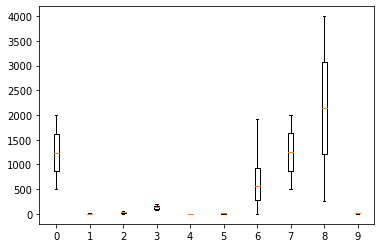

In [27]:
import numpy as np
fig = plt.figure()
ax = plt.subplot(111)
i=0
for x in int_cols:
    ax.boxplot(data[x], positions = [i])
    i+=1
ax.set_xlim(-0.5, 9.5)
plt.show()

In [28]:
for x in float_cols:
    q1=data[x].quantile(.25)
    q3=data[x].quantile(.75)
    iqr = q3-q1
    ul = q3+ 1.5 * iqr
    ll = q1- 1.5 * iqr
    data[x][data[x]>ul] = ul
    data[x][data[x]<ll] = ll

C:\Users\chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


C:\Users\chris\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\Users\chris\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\chris\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\chris\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\chris\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


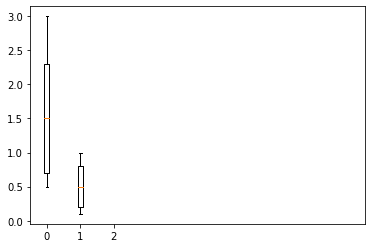

In [29]:
import numpy as np
fig = plt.figure()
ax = plt.subplot(111)
i=0
for x in float_cols:
    ax.boxplot(data[x], positions = [i])
    i+=1
ax.set_xlim(-0.5, 9.5)
plt.show()

In [30]:
data.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,...,four_g_No,four_g_Yes,three_g_No,three_g_Yes,touch_screen_No,touch_screen_Yes,wifi_No,wifi_Yes,type_Test,type_Train
0,842,2.2,1,7,0.6,188,2,2,20.0,756,...,1,0,1,0,1,0,0,1,0,1
1,1021,0.5,0,53,0.7,136,3,6,905.0,1988,...,0,1,0,1,0,1,1,0,0,1
2,563,0.5,2,41,0.9,145,5,6,1263.0,1716,...,0,1,0,1,0,1,1,0,0,1
3,615,2.5,0,10,0.8,131,6,9,1216.0,1786,...,1,0,0,1,1,0,1,0,0,1
4,1821,1.2,13,44,0.6,141,2,14,1208.0,1212,...,0,1,0,1,0,1,1,0,0,1


### Split the data back to train and test 

In [31]:
train = data[data.type_Train==1]
test = data[data.type_Test==1]

In [32]:
train.shape

(2000, 29)

In [33]:
test.shape

(1000, 29)

In [34]:
train = train.drop(['type_Test','type_Train'],axis=1)
test = test.drop(['type_Test','type_Train'],axis=1)

In [35]:
train.shape

(2000, 27)

In [36]:
test.shape

(1000, 27)

### Train data is used for model training and evaluation

In [37]:
X = train.drop('price',axis=1)
y = train['price']

In [38]:
#splitting data for training and evaluation

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42) #0.67 data will be for training.

### Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV #this is used for hyper parameter tuning

In [40]:
normalize_vals = [True,False]
n_jobs_vals =[1,2,5,10]

parameters = {'normalize':normalize_vals , 'n_jobs': n_jobs_vals }

In [41]:
reg = LinearRegression()

linear_regressor = GridSearchCV(reg, parameters)

linear_regressor.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'n_jobs': [1, 2, 5, 10], 'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [42]:
reg.get_params().keys() #list of paramters

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize'])

In [43]:
linear_regressor.best_estimator_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
linear_regressor.best_params_

{'n_jobs': 1, 'normalize': False}

In [45]:
linear_regressor.score(X_train, y_train)

0.9294912617469377

In [46]:
linear=LinearRegression(normalize=False,n_jobs=1)
linear.fit(X_train,y_train)
y_pred_linear=linear.predict(X_test)

In [47]:
from sklearn.metrics import mean_squared_error

In [48]:
Linear_Evaluation_Error=mean_squared_error(y_pred_linear,y_test)
Linear_Evaluation_Error

2118473.9802574143

In [49]:
#training error
y_pred_linear_train=linear.predict(X_train)
Linear_Training_Error=mean_squared_error(y_pred_linear_train,y_train)
Linear_Training_Error

2107767.097294887

### There is no huge differnece in training and testing error. so the assumption is that there is no overfitting

### Lasso Regression

In [50]:
from sklearn.linear_model import Lasso

lasso = Lasso()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20],'normalize' : [True,False] }

lasso_regressor = GridSearchCV(lasso, parameters)

lasso_regressor.fit(X_train, y_train)

C:\Users\chris\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1074845248.1458254, tolerance: 3187472.470629851
  positive)
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 942129304.0517998, tolerance: 3240414.1646879665
  positive)
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1032908590.3571271, tolerance: 3177593.108342911
  positive)
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [51]:
BP=lasso_regressor.best_params_
BP

{'alpha': 1, 'normalize': True}

In [52]:
lasso=Lasso(alpha=BP['alpha'] , normalize = BP['normalize'])
lasso.fit(X_train,y_train)
y_pred_lasso=lasso.predict(X_test)

In [53]:
Lasso_Error=mean_squared_error(y_pred_lasso,y_test)
Lasso_Error

2117613.684092968